In [1]:
import json 
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GEETAMAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GEETAMAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GEETAMAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GEETAMAM\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GEETAMAM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import json

# Load the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)


print(json.dumps(data, indent=4))

{
    "intents": [
        {
            "tag": "what_illness_mean",
            "patterns": [
                "What does it mean to have a mental illness?"
            ],
            "responses": [
                "Mental illnesses are health conditions that disrupt a person's thoughts, emotions, relationships, and daily functioning. They are associated with distress and diminished capacity to engage in the ordinary activities of daily life.\nMental illnesses fall along a continuum of severity: some are fairly mild and only interfere with some aspects of life, such as certain phobias. On the other end of the spectrum lie serious mental illnesses, which result in major functional impairment and interference with daily life. These include such disorders as major depression, schizophrenia, and bipolar disorder, and may require that the person receives care in a hospital.\nIt is important to know that mental illnesses are medical conditions that have nothing to do with a person's characte

In [3]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [4]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [5]:
vocab_size = 2000
embedding_dim = 16
max_len = 30
oov_token = "<OOV>"
#tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [6]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(16, return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            32000     
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 129)               2193      
                                                                 
Total params: 36,577
Trainable params: 36,577
Non-trainable params: 0
_________________________________________________________________


In [7]:
epochs = 200
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/200
8/8 [==============================] - 9s 34ms/step - loss: 4.8597 - accuracy: 0.0398
Epoch 2/200
8/8 [==============================] - 0s 27ms/step - loss: 4.8542 - accuracy: 0.0677
Epoch 3/200
8/8 [==============================] - 0s 27ms/step - loss: 4.8484 - accuracy: 0.0677
Epoch 4/200
8/8 [==============================] - 0s 28ms/step - loss: 4.8382 - accuracy: 0.0637
Epoch 5/200
8/8 [==============================] - 0s 28ms/step - loss: 4.8204 - accuracy: 0.0637
Epoch 6/200
8/8 [==============================] - 0s 30ms/step - loss: 4.7856 - accuracy: 0.0637
Epoch 7/200
8/8 [==============================] - 0s 31ms/step - loss: 4.7434 - accuracy: 0.0717
Epoch 8/200
8/8 [==============================] - 0s 37ms/step - loss: 4.7048 - accuracy: 0.0518
Epoch 9/200
8/8 [==============================] - 0s 47ms/step - loss: 4.6796 - accuracy: 0.0637
Epoch 10/200
8/8 [==============================] - 0s 34ms/step - loss: 4.6487 - accuracy: 0.0677
Epoch 11/200
8/8 [=

8/8 [==============================] - 0s 33ms/step - loss: 2.1418 - accuracy: 0.4582
Epoch 84/200
8/8 [==============================] - 0s 32ms/step - loss: 2.1105 - accuracy: 0.4582
Epoch 85/200
8/8 [==============================] - 0s 30ms/step - loss: 2.0787 - accuracy: 0.4661
Epoch 86/200
8/8 [==============================] - 0s 23ms/step - loss: 2.0474 - accuracy: 0.4821
Epoch 87/200
8/8 [==============================] - 0s 24ms/step - loss: 2.0180 - accuracy: 0.4900
Epoch 88/200
8/8 [==============================] - 0s 23ms/step - loss: 1.9834 - accuracy: 0.5060
Epoch 89/200
8/8 [==============================] - 0s 27ms/step - loss: 1.9604 - accuracy: 0.5100
Epoch 90/200
8/8 [==============================] - 0s 25ms/step - loss: 1.9266 - accuracy: 0.5139
Epoch 91/200
8/8 [==============================] - 0s 26ms/step - loss: 1.8959 - accuracy: 0.5219
Epoch 92/200
8/8 [==============================] - 0s 26ms/step - loss: 1.8594 - accuracy: 0.5259
Epoch 93/200
8/8 [=====

8/8 [==============================] - 0s 29ms/step - loss: 0.5258 - accuracy: 0.9442
Epoch 166/200
8/8 [==============================] - 0s 25ms/step - loss: 0.5171 - accuracy: 0.9482
Epoch 167/200
8/8 [==============================] - 0s 27ms/step - loss: 0.5122 - accuracy: 0.9402
Epoch 168/200
8/8 [==============================] - 0s 28ms/step - loss: 0.5033 - accuracy: 0.9482
Epoch 169/200
8/8 [==============================] - 0s 26ms/step - loss: 0.4950 - accuracy: 0.9482
Epoch 170/200
8/8 [==============================] - 0s 27ms/step - loss: 0.4858 - accuracy: 0.9482
Epoch 171/200
8/8 [==============================] - 0s 29ms/step - loss: 0.4788 - accuracy: 0.9482
Epoch 172/200
8/8 [==============================] - 0s 31ms/step - loss: 0.4701 - accuracy: 0.9522
Epoch 173/200
8/8 [==============================] - 0s 34ms/step - loss: 0.4616 - accuracy: 0.9442
Epoch 174/200
8/8 [==============================] - 0s 29ms/step - loss: 0.4546 - accuracy: 0.9522
Epoch 175/200


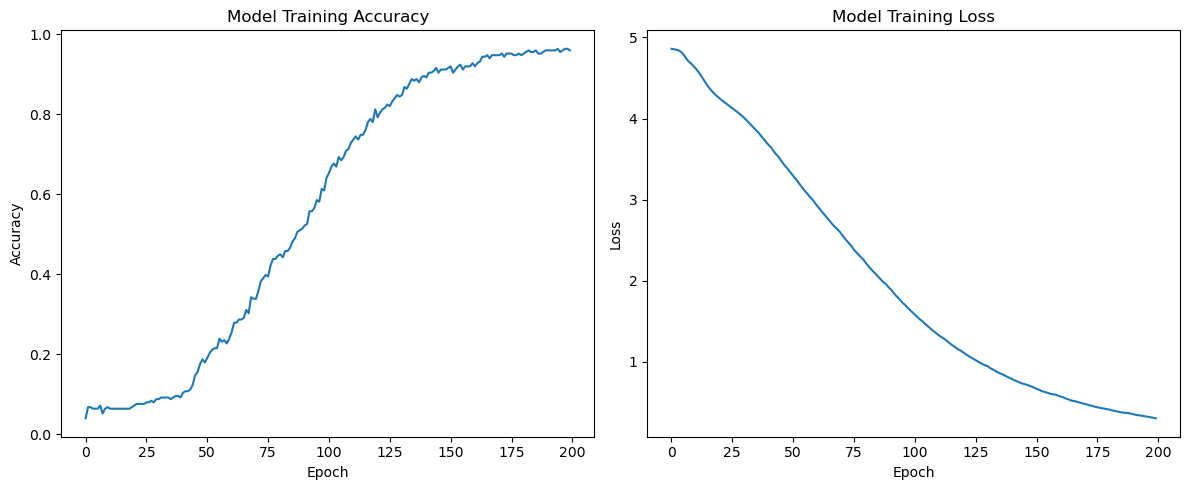

In [8]:

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

fig = plt.gcf()
fig.set_size_inches(12, 5)

plt.tight_layout()
plt.show()

In [47]:
# to save the trained model
model.save("chat_model.h5")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences


with open("data.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model.h5')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 30
    
    while True:
        inp = input()
        if inp.lower() == "bye":
            break

        result = model.predict(pad_sequences(tokenizer.texts_to_sequences([inp]),
                                              truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print("ChatBot:", np.random.choice(i['responses']))
                break

print( "Start messaging with the bot (type bye to stop)!")
chat()
print("ChatBot: see you later!!")

Start messaging with the bot (type bye to stop)!
User: hey
1/1 [==============================] - 1s 737ms/step
ChatBot: Hey There!
User: i need help
1/1 [==============================] - 0s 83ms/step
ChatBot: Tell me your problem to assist you
User: i feel anxious
1/1 [==============================] - 0s 47ms/step
ChatBot: Anxiety is a feeling of worry, nervousness, or unease about something with an uncertain outcome. It is a normal and sometimes helpful response to stress, but when it becomes chronic or overwhelming, it can interfere with daily life. Treatment for anxiety may include therapy, medication, or a combination of both. Symptoms of anxiety may include restlessness, fatigue, irritability, and difficulty concentrating.
User: thanks
1/1 [==============================] - 0s 42ms/step
ChatBot: I'm glad I could be of assistance.
User: bye
ChatBot: see you later!!
